In [1]:
# TS forecasting with ARIMA

In [12]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Step 1 : Read the Data

In [18]:
df = pd.read_csv('../data/trend.csv',parse_dates=['login_date'],index_col=['login_date'])

In [53]:
df.head()

,sales
login_date,
2014-01-01,120
2014-01-02,122
2014-01-03,132
2014-01-04,136
2014-01-05,145


## Step 2 : Resample the data

In [26]:
# No Resampling needed as data is daily

## Step 3: Plot the data


<AxesSubplot:xlabel='login_date'>

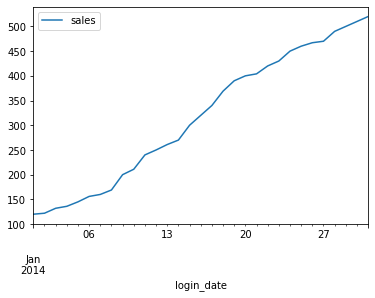

In [27]:
df.plot()

## Step 4 : Check Stationarity

In [28]:
import statsmodels.api as sm

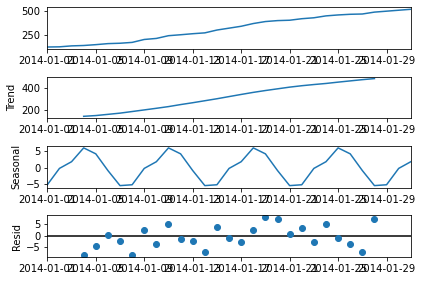

In [31]:
decomposition = sm.tsa.seasonal_decompose(df,model='additive')
fig = decomposition.plot()

## AdFuller

In [32]:
from statsmodels.tsa.stattools import adfuller

In [35]:
adtest = adfuller(df)

In [38]:
## P val for adfuller
adtest[1]

0.9639660116664333

## Step 5 : Train Test Split 

In [40]:
len(df)

31

In [42]:
train = df[:24]

In [43]:
test = df [24:]

In [51]:
train.iloc[-1] , test.iloc[0]

(sales    450
 Name: 2014-01-24 00:00:00, dtype: int64,
 sales    460
 Name: 2014-01-25 00:00:00, dtype: int64)

## PLOT ACF PACF

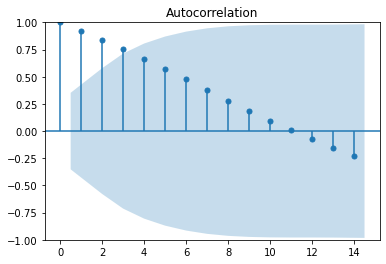

In [72]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

acf_plot = plot_acf(df.sales, lags=14)

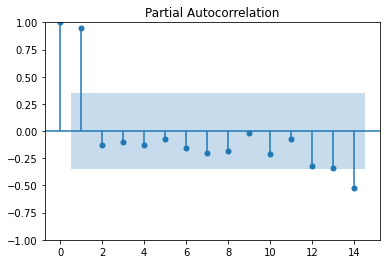

In [71]:
pacf_plot = plot_pacf(df.sales,lags=14)

## Step 6 : ARIMA Model Building

**So ARIMA has few things:**
- 1. AR(Auto Regressive) : It depends on the previous values. i.e. Regression with its past values. Order of AR : P
- 2. MA(Moving AVG) : It depends on Moving AVG. Depends on Error terms as well. Order of MA : Q. PACF shows corrn betn lagged values.

- 3. I(Integrated) : Integrated Component depends on the Differencing term. i.e. it try to recover the seasonality and trend factor from the model. Order is d. Technically it should be differencing term.


In [130]:
from statsmodels.tsa.arima.model import ARIMA

In [131]:
model = ARIMA(train,order=(1, 0, 3)).fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


In [132]:
pred = model.predict(start=len(train),end=(len(df)-1) )

In [133]:
pred

2014-01-25    463.234815
2014-01-26    468.773780
2014-01-27    469.421807
2014-01-28    466.854647
2014-01-29    464.319961
2014-01-30    461.817337
2014-01-31    459.346371
Freq: D, Name: predicted_mean, dtype: float64

<AxesSubplot:>

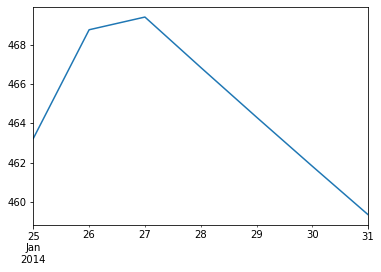

In [134]:
pred.plot()

Line graph: 


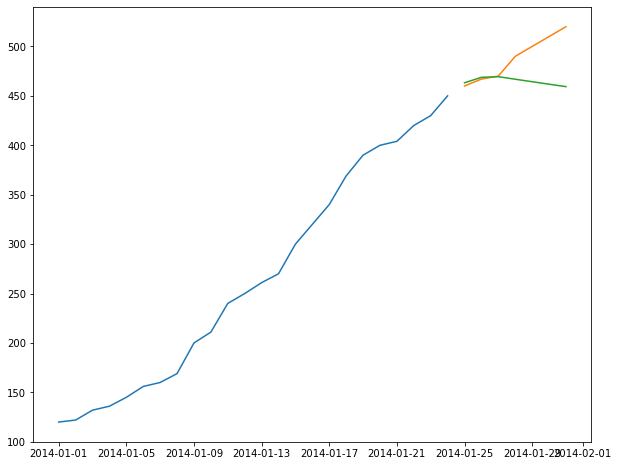

In [135]:
# plotting a line graph
plt.figure(figsize=(10,8))
print("Line graph: ")
plt.plot(train)
plt.plot(test)

plt.plot(pred)
plt.show()

In [150]:
prediction_rolling = pd.Series()
import datetime
import warnings

warnings.filterwarnings('ignore')

for end_date in test.index:
    train_data = df.sales[:end_date-datetime.timedelta(days=1)]
    model = ARIMA(train,order=(1, 0, 3))
    model_fit = model.fit()
    pred = model_fit.predict(end_date)
    prediction_rolling.loc[end_date] = pred.loc[end_date]

In [151]:
prediction_rolling

2014-01-25    463.234815
2014-01-26    468.773780
2014-01-27    469.421807
2014-01-28    466.854647
2014-01-29    464.319961
2014-01-30    461.817337
2014-01-31    459.346371
dtype: float64

Line graph: 


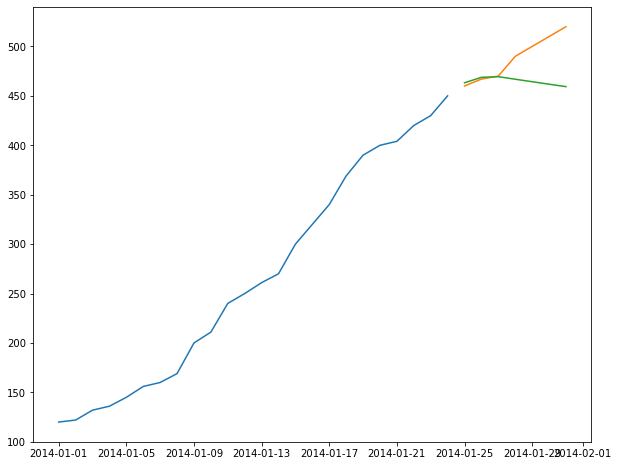

In [152]:
# plotting a line graph
plt.figure(figsize=(10,8))
print("Line graph: ")
plt.plot(train)
plt.plot(test)
plt.plot(prediction_rolling)
plt.show()